# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

# Avocado is a fruit consumed by people heavily in the United States. 

# The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

# The task is to make a mode that can consider the data provided and predict the Average Price.



# This is regression problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Avocado.csv')

In [4]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=pd.read_csv('Avocado.csv',index_col=0)

In [11]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 I have removed unwanted feature Unnamed: 0 from the datset.
 There are in total 16468 records and 13 columns

In [14]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

There are three features having categorical/object datatype. Further, the remaining features are having float datatype.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16468 entries, 0.0 to nan
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


There are in total 1517 non null values and the remaining 14951 are null values in the datasets.

In [18]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

<AxesSubplot:>

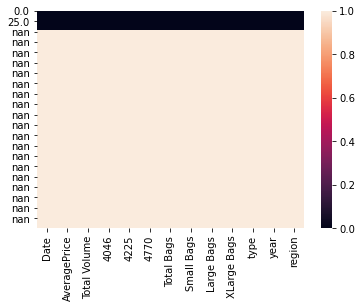

In [19]:
sns.heatmap(df.isnull())

It can be confirmed there are null values in the dataset from the heatmap.

I am dropping Null values as it makes no sense in replacing the same with the mean and median of the respective feature as the entire 14951 records are empty not a single value is there against the features they are completely empty.

In [21]:
df.dropna(inplace=True)

In [22]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


There are in total 1517 records and 13 columns after elimination of the null values.

Splitting Date feature into month and year.

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [32]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,2015,12
1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,2015,12
2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,2015,12
3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,2015,6
4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,2016,10
11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,2016,9
12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2016,2
13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,2016,9


In [44]:
pd.set_option('display.max_rows',None)
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,Month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,2015.162821,6.362558
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,0.369324,3.472146
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,2015.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,2015.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,2015.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,2015.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,2016.000000,12.000000


In [43]:
len(df['Total Volume'])

1517

In [40]:
The count of total volume(records) are 1517 

1517

In [45]:
df['Total Volume'].value_counts()

453631.25      1
198395.76      1
63902.90       1
592588.01      1
63608.01       1
743066.25      1
108051.54      1
2433295.61     1
1402841.83     1
114328.40      1
718330.48      1
44511.28       1
370830.93      1
89534.81       1
830967.23      1
47362.13       1
252853.41      1
929492.14      1
462548.30      1
77987.53       1
315984.22      1
201797.82      1
99545.41       1
535519.29      1
356627.38      1
339797.19      1
5544366.95     1
401331.33      1
868197.41      1
232074.44      1
86318.90       1
160438.38      1
453173.22      1
626972.88      1
156112.67      1
5471565.28     1
71777.85       1
5201535.32     1
5451636.92     1
326067.03      1
148164.20      1
464305.03      1
274209.20      1
85044.45       1
1111803.12     1
147525.59      1
33091256.26    1
642682.40      1
310672.40      1
1093424.59     1
219071.79      1
2044020.93     1
955510.57      1
154742.81      1
154802.00      1
508174.09      1
892151.19      1
6060843.76     1
78992.15      

In [56]:
print(df['Total Volume'].mean())
print(df['Total Volume'].median())

1601878.5774555043
402791.0


In [57]:
print(df['4046'].mean())
print(df['4046'].median())

646438.6541133816
81751.17


In [58]:
print(df['4225'].mean())
print(df['4225'].median())

611437.5025906389
118664.89


In [59]:
print(df['4770'].mean())
print(df['4770'].median())

50405.495398813444
7688.17


In [60]:
print(df['Total Bags'].mean())
print(df['Total Bags'].median())

293597.41573500354
73979.06


In [62]:
print(df['Small Bags'].mean())
print(df['Small Bags'].median())

248773.59528675006
62375.69


In [64]:
print(df['Large Bags'].mean())
print(df['Large Bags'].median())

42642.049373764
5044.35


In [67]:
print(df['XLarge Bags'].mean())

2181.7710744891233


In [68]:
print(df['XLarge Bags'].median())

0.0


As per the calculation of mean and median for all the features it can be said that all the features are having right tailed skewness. Further, as there is hugh difference between mean and median for all the features it can be said outliers are present.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

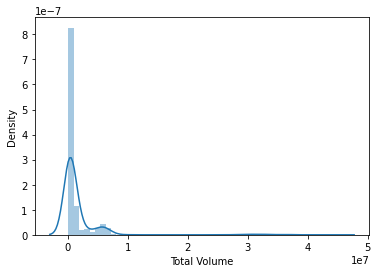

In [70]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

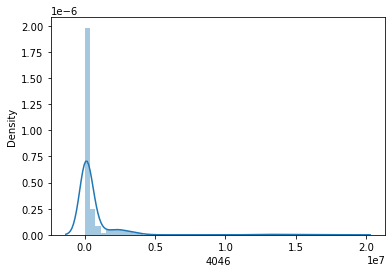

In [71]:
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

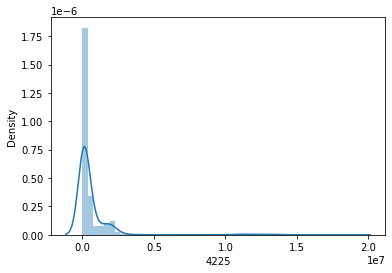

In [72]:
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

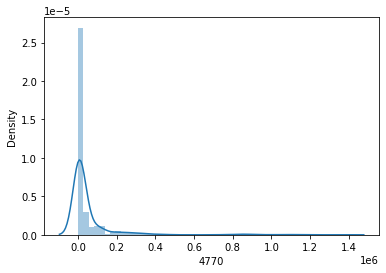

In [74]:
sns.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

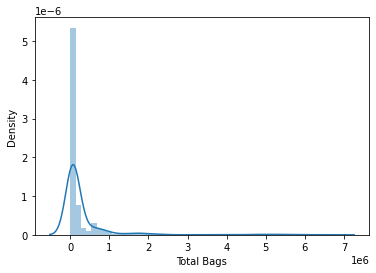

In [75]:
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

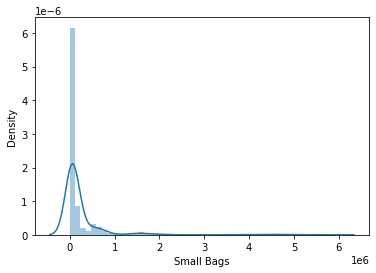

In [76]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

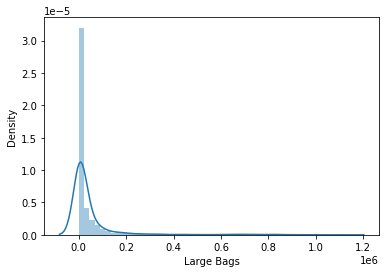

In [77]:
sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

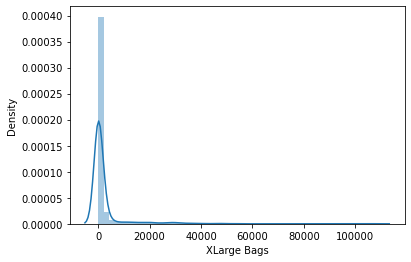

In [78]:
sns.distplot(df['XLarge Bags'])

<AxesSubplot:xlabel='type', ylabel='count'>

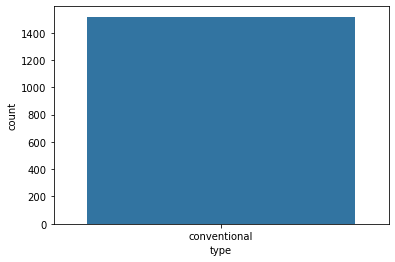

In [82]:
sns.countplot(df['type'])

In [83]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

There are 1517 conventional type avocados.

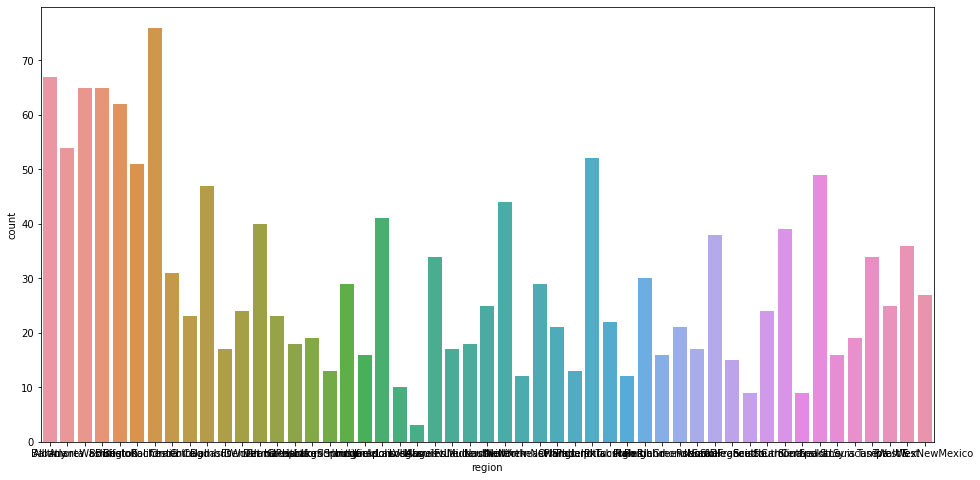

In [85]:
plt.figure(figsize=[16,8])
sns.countplot(df['region'])
plt.show()

In [86]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

The maximum observations are from Califomia and the minimum obseravtions are from LosAngeles.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

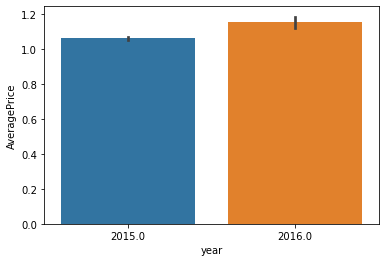

In [88]:
sns.barplot(x='year',y='AveragePrice',data=df)

The Average price is higher in 2016 as compared to 2015

In [89]:
df.pivot_table(index='year',values='AveragePrice',aggfunc=np.median)

,AveragePrice
year,
2015.0,1.07
2016.0,1.12


The Average price in 2016 is approx 1.12 and that in 2015 is 1.07

In [90]:
df.pivot_table(index='region',values='AveragePrice',aggfunc=np.median)

,AveragePrice
region,
Albany,1.220
Atlanta,1.010
BaltimoreWashington,1.160
Boise,0.990
Boston,1.175
BuffaloRochester,1.300
California,1.060
Charlotte,1.240
Chicago,1.240


In [94]:
df.groupby(['region'])['AveragePrice'].agg({'min','max'})

,max,min
region,,
Albany,1.63,0.93
Atlanta,1.15,0.76
BaltimoreWashington,1.34,0.95
Boise,1.37,0.58
Boston,1.62,0.85
BuffaloRochester,1.66,1.04
California,1.68,0.70
Charlotte,1.64,1.00
Chicago,1.27,1.04


The average price per avocado is highest in Califonia region which is 1.68 and the lowest is in Phoenix Tucson which is 0.49.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

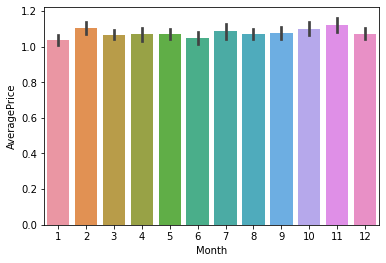

In [95]:
sns.barplot(x='Month',y='AveragePrice',data=df)

In [96]:
df.pivot_table(index='Month',values='AveragePrice',aggfunc=np.median)

,AveragePrice
Month,
1,1.040
2,1.120
3,1.090
4,1.080
5,1.090
6,1.060
7,1.090
8,1.080
9,1.070


The highest price per unit of avocado is in Feb month anfd the lowest is in Jan month.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

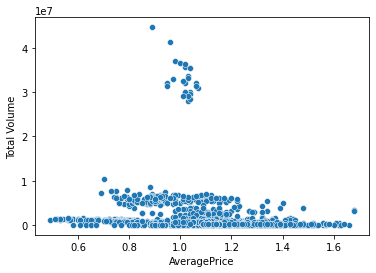

In [99]:
sns.scatterplot(x='AveragePrice',y='Total Volume',data=df)

As such there is no such relationship observed between feature Average price and Total Volume.
There may be the outliers in the Volume feature as few of the data are concentrated in range 2.5 to 4.5.

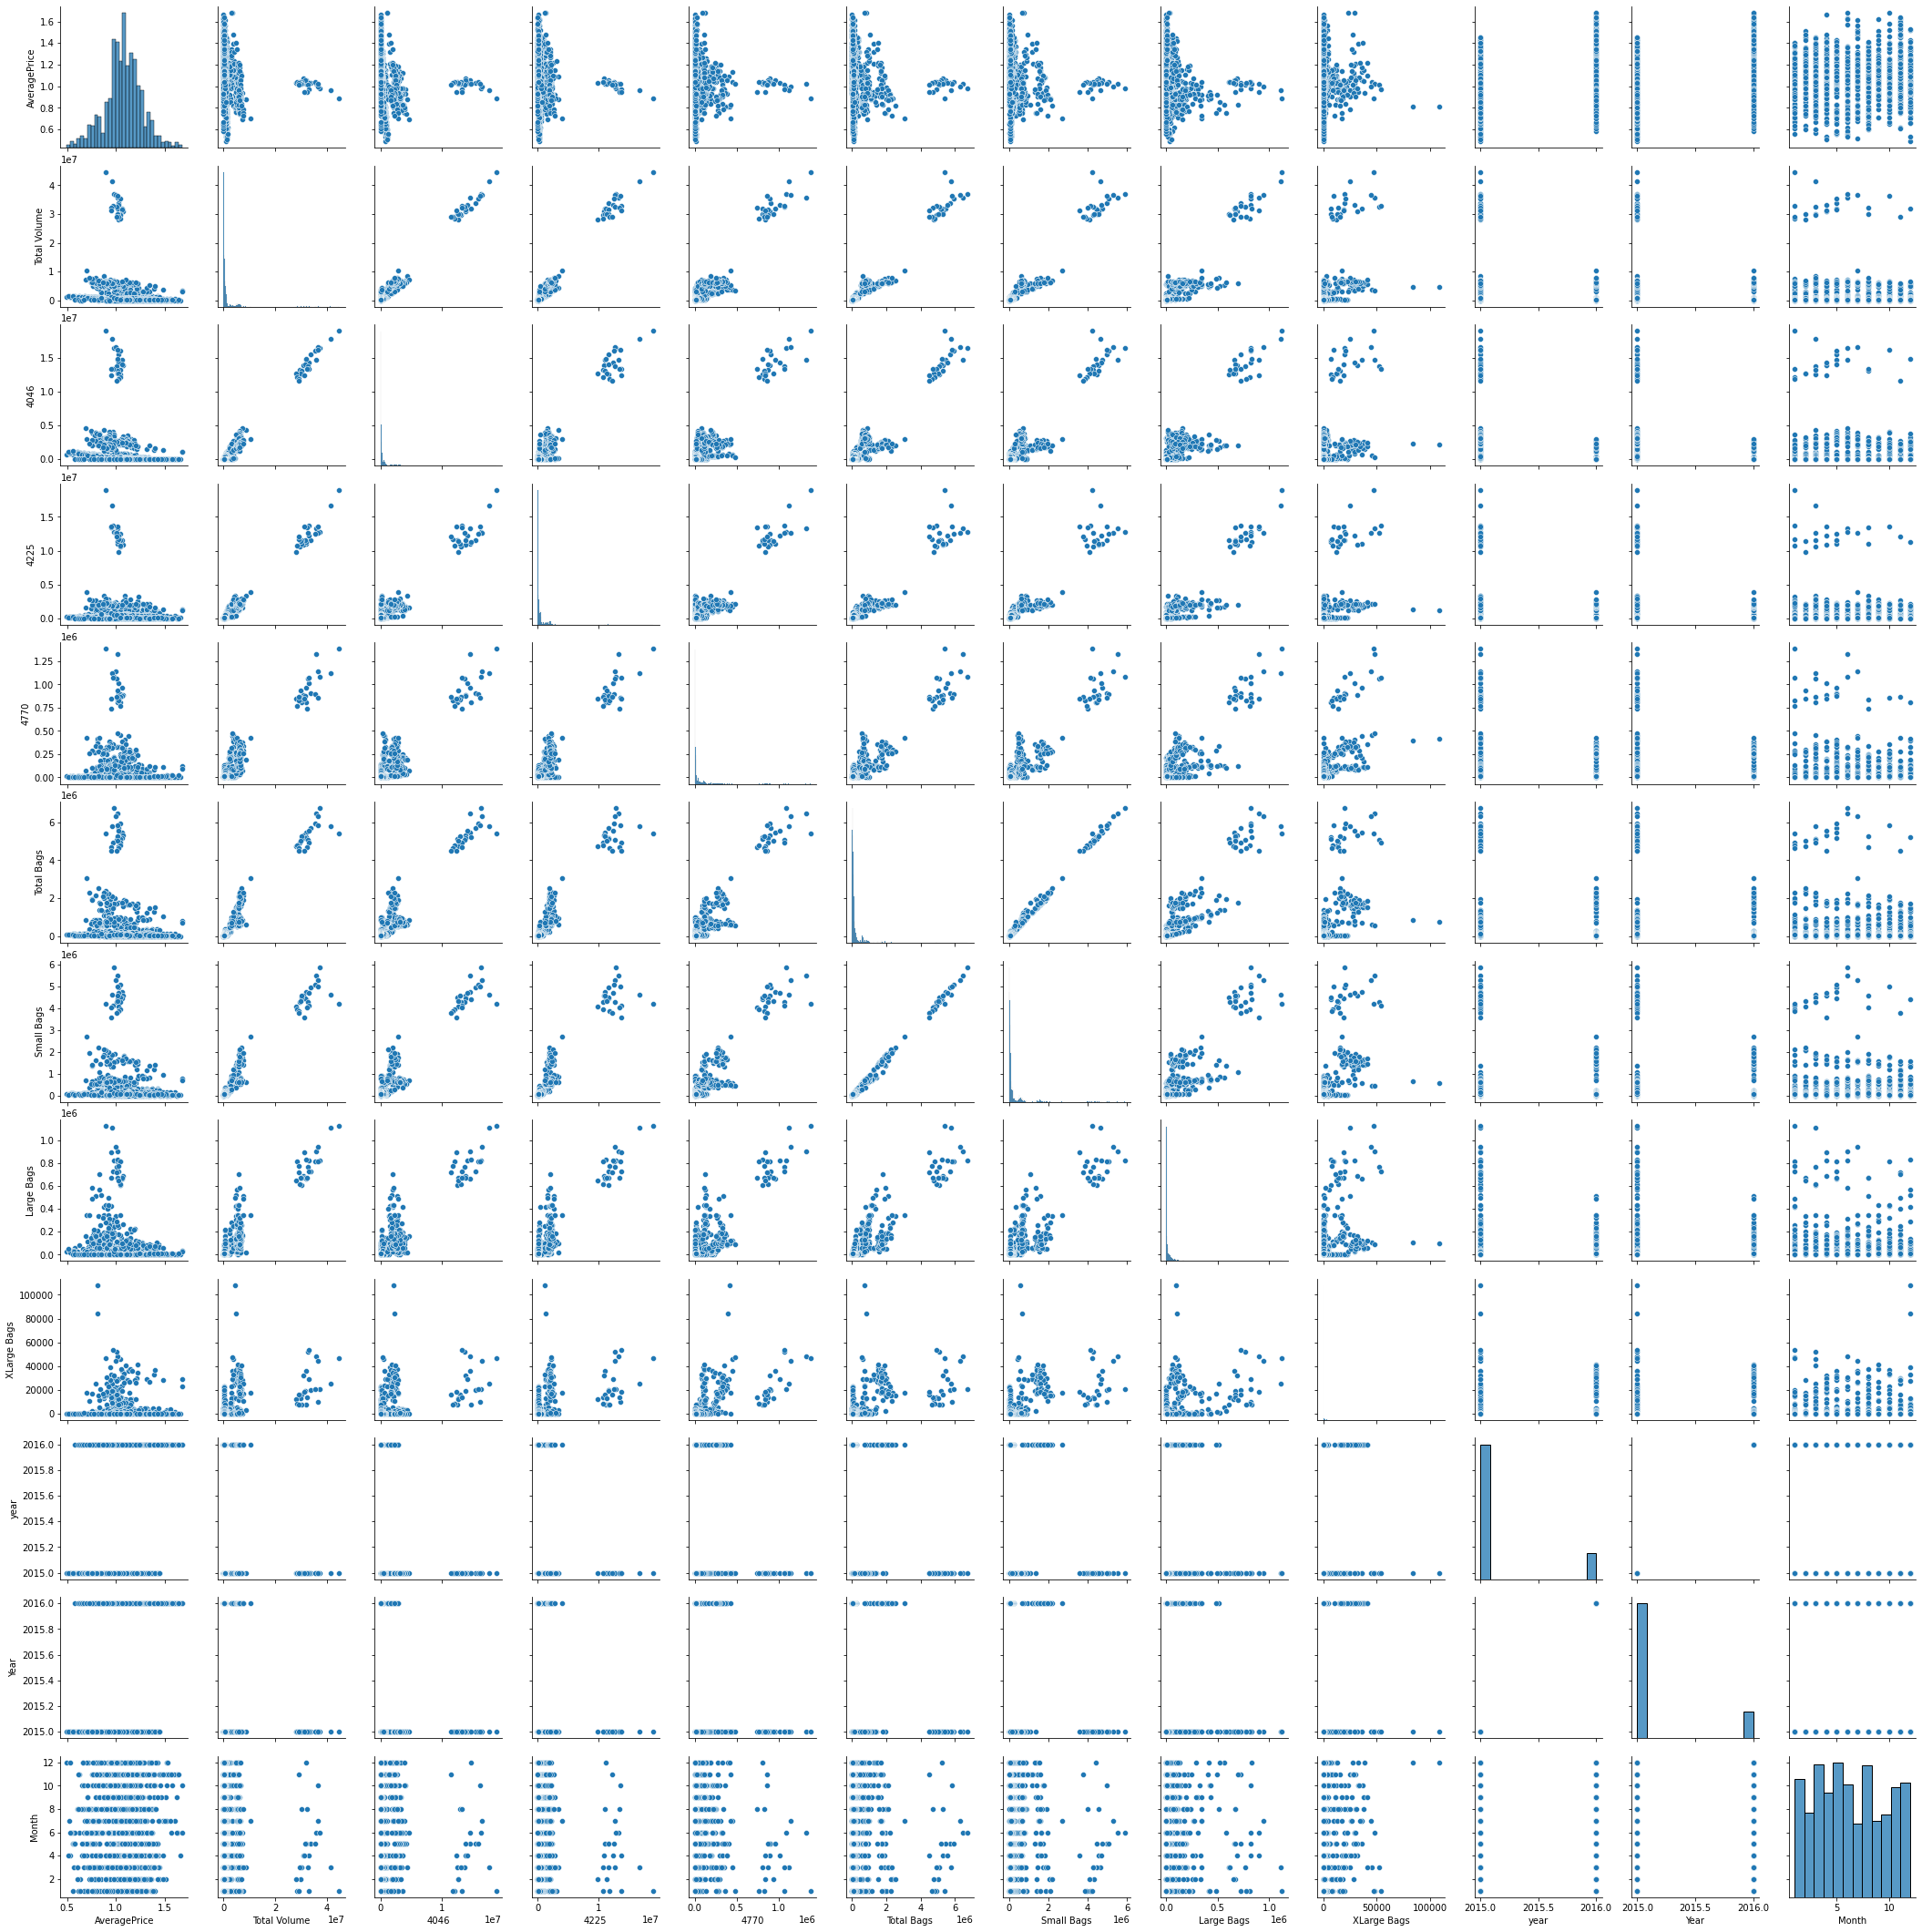

In [101]:
sns.pairplot(df)

<AxesSubplot:xlabel='AveragePrice', ylabel='4046'>

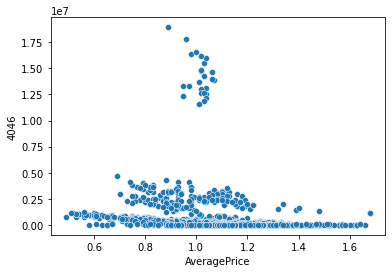

In [102]:
sns.scatterplot(x='AveragePrice',y='4046',data=df)

As such there is no such relationship observed between feature Average price and 4046.
There may be the outliers in the Volume feature as few of the data are concentrated in range 1.25 to 1.8

In [103]:
df['AveragePrice'].min()

0.49

In [104]:
df['AveragePrice'].max()

1.68

The min price of avocado per unit is 0.49 and the maximum price is 1.68.

<AxesSubplot:xlabel='AveragePrice', ylabel='4225'>

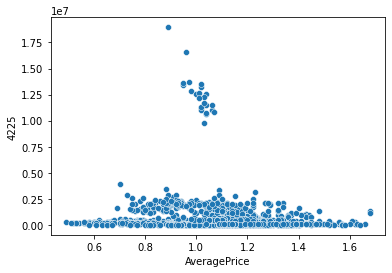

In [105]:
sns.scatterplot(x='AveragePrice',y='4225',data=df)

As such there is no such relationship observed between feature Average price and 4225.
There may be the outliers in the Volume feature as few of the data are concentrated in range 1. to 1.8

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

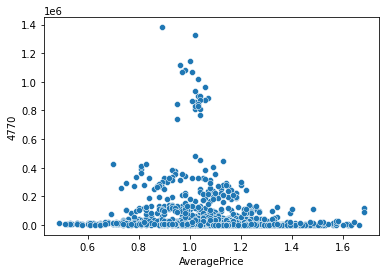

In [107]:
sns.scatterplot(x='AveragePrice',y='4770',data=df)

As such there is no such relationship observed between feature Average price and 4770.
There may be the outliers in the Volume feature as few of the data are concentrated in range 1 to 1.4.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

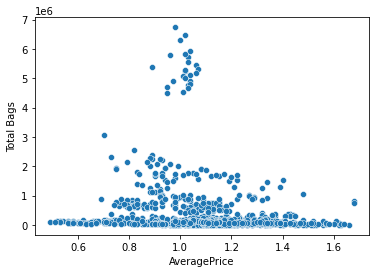

In [108]:
sns.scatterplot(x='AveragePrice',y='Total Bags',data=df)

As such there is no such relationship observed between feature Average price and Total Bags.
There may be the outliers in the Volume feature as few of the data are concentrated in range 4 to 7.

<AxesSubplot:xlabel='AveragePrice', ylabel='Small Bags'>

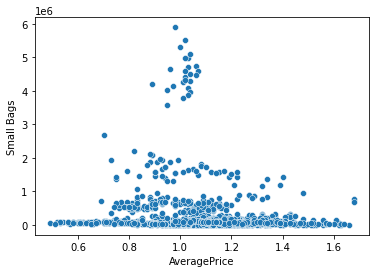

In [109]:
sns.scatterplot(x='AveragePrice',y='Small Bags',data=df)

As such there is no such relationship observed between feature Average price and Small Bags.
There may be the outliers in the Volume feature as few of the data are concentrated in range 4 to 6.

<AxesSubplot:xlabel='AveragePrice', ylabel='Large Bags'>

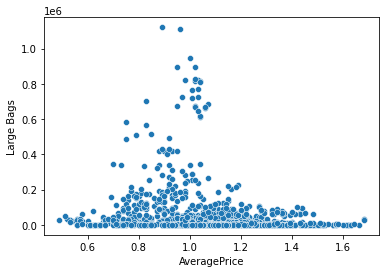

In [110]:
sns.scatterplot(x='AveragePrice',y='Large Bags',data=df)

As such there is no such relationship observed between feature Average price and Large Bags.

<AxesSubplot:xlabel='AveragePrice', ylabel='XLarge Bags'>

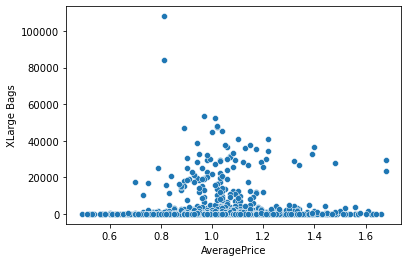

In [112]:
sns.scatterplot(x='AveragePrice',y='XLarge Bags',data=df)

As such there is no such relationship observed between feature Average price and XLarge Bags.

# Checking out for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x274ef553bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x274ef5602b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274ef553850>],
 'medians': [<matplotlib.lines.Line2D at 0x274ef560970>],
 'fliers': [<matplotlib.lines.Line2D at 0x274ef560cd0>],
 'means': []}

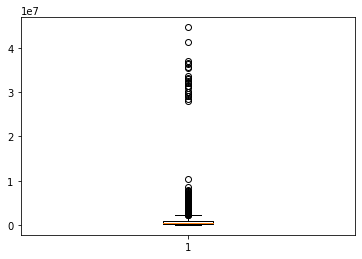

In [113]:
plt.boxplot(df['Total Volume'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f0561fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x274f056c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f0561c40>],
 'medians': [<matplotlib.lines.Line2D at 0x274f056cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f0575100>],
 'means': []}

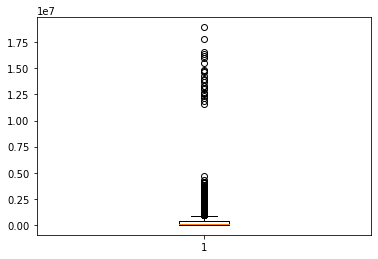

In [114]:
plt.boxplot(df['4046'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f05b01f0>,
 'caps': [<matplotlib.lines.Line2D at 0x274f05b08b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f05a6e50>],
 'medians': [<matplotlib.lines.Line2D at 0x274f05b0f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f05b7310>],
 'means': []}

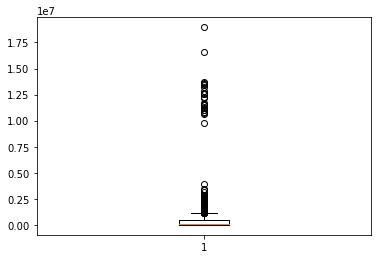

In [115]:
plt.boxplot(df['4225'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f05f5400>,
 'caps': [<matplotlib.lines.Line2D at 0x274f05f5ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f05f50a0>],
 'medians': [<matplotlib.lines.Line2D at 0x274f05fc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f05fc520>],
 'means': []}

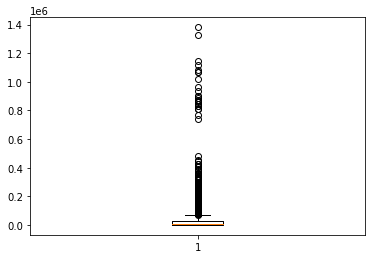

In [116]:
plt.boxplot(df['4770'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f0639610>,
 'caps': [<matplotlib.lines.Line2D at 0x274f0639cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f06392b0>],
 'medians': [<matplotlib.lines.Line2D at 0x274f06403d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f0640730>],
 'means': []}

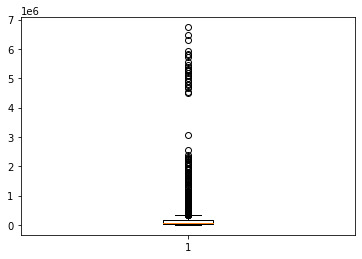

In [117]:
plt.boxplot(df['Total Bags'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f067b910>,
 'caps': [<matplotlib.lines.Line2D at 0x274f067bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f067b610>],
 'medians': [<matplotlib.lines.Line2D at 0x274f06866a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f06869d0>],
 'means': []}

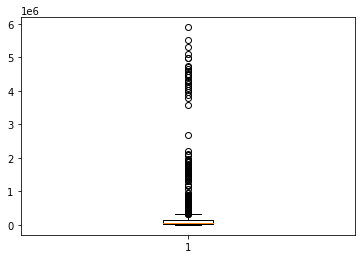

In [119]:
plt.boxplot(df['Small Bags'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f06c1670>,
 'caps': [<matplotlib.lines.Line2D at 0x274f06c1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f06c1310>],
 'medians': [<matplotlib.lines.Line2D at 0x274f06c9430>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f06c9790>],
 'means': []}

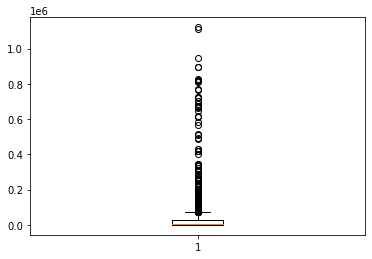

In [120]:
plt.boxplot(df['Large Bags'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274f070df40>,
 'caps': [<matplotlib.lines.Line2D at 0x274f071d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x274f070dbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x274f071dd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x274f07290a0>],
 'means': []}

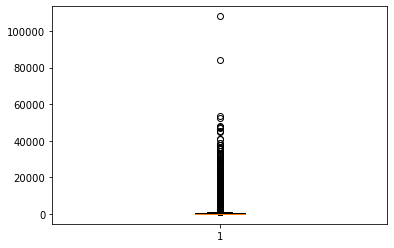

In [121]:
plt.boxplot(df['XLarge Bags'])

There are outliers present in all the numerical features.

In [122]:
print(df['Total Volume'].min())
print(df['Total Volume'].max())

38750
44655461


In [123]:
print(df['4046'].min())
print(df['4046'].max())

467.72
18933038.04


In [124]:
print(df['4225'].min())
print(df['4225'].max())

1783.77
18956479.74


In [125]:
print(df['4770'].min())
print(df['4770'].max())

0.0
1381516.11


In [127]:
print(df['Total Bags'].min())
print(df['Total Bags'].max())

3311.77
6736304.04


In [128]:
print(df['Small Bags'].min())
print(df['Small Bags'].max())

3311.77
5893641.72


In [129]:
print(df['Large Bags'].min())
print(df['Large Bags'].max())

0.0
1121076.47


In [130]:
print(df['XLarge Bags'].min())
print(df['XLarge Bags'].max())

0.0
108072.79


# Applying IQR  to treat outliers

In [132]:
df1=df.copy()

In [246]:
df2=df.copy()

In [248]:
df3=df.copy()

In [249]:
df4=df.copy()

In [250]:
Q1=df4['Total Volume'].quantile(0.25)
Q3=df4['Total Volume'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR

In [251]:
df4['Total Volume']=df4['Total Volume'].astype('float')
df4['Total Volume'].values[df4['Total Volume']>upper_boundary]=np.nan

In [252]:
df4['Total Volume']=df4['Total Volume'].fillna(df4['Total Volume'].median())

In [254]:
Q11=df4['4046'].quantile(0.25)
Q31=df4['4046'].quantile(0.75)
IQR1=Q31-Q11
lower_boundary1=Q11-1.5*IQR1
upper_boundary1=Q31+1.5*IQR1
df4['4046'].values[df4['4046']>upper_boundary1]=np.nan

In [255]:
df4['4046']=df4['4046'].fillna(df4['4046'].median())

In [257]:
Q111=df4['4225'].quantile(0.25)
Q311=df4['4225'].quantile(0.75)
IQR2=Q311-Q111
lower_boundary2=Q111-1.5*IQR2
upper_boundary2=Q311+1.5*IQR2
df4['4225'].values[df4['4225']>upper_boundary2]=np.nan

In [258]:
df4['4225']=df4['4225'].fillna(df4['4225'].median())

In [259]:
Q1111=df4['4770'].quantile(0.25)
Q3111=df4['4770'].quantile(0.75)
IQR3=Q3111-Q1111
lower_boundary3=Q1111-1.5*IQR3
upper_boundary3=Q3111+1.5*IQR3
df4['4770'].values[df4['4770']>upper_boundary3]=np.nan

In [260]:
df4['4770']=df4['4770'].fillna(df4['4770'].median())

In [261]:
Q12=df4['Total Bags'].quantile(0.25)
Q32=df4['Total Bags'].quantile(0.75)
IQR4=Q32-Q12
lower_boundary4=Q12-1.5*IQR4
upper_boundary4=Q32+1.5*IQR4
df4['Total Bags'].values[df4['Total Bags']>upper_boundary4]=np.nan

In [262]:
df4['Total Bags']=df4['Total Bags'].fillna(df4['Total Bags'].median())

In [265]:
Q123=df4['Small Bags'].quantile(0.25)
Q322=df4['Small Bags'].quantile(0.75)
IQR5=Q322-Q123
lower_boundary5=Q123-1.5*IQR5
upper_boundary5=Q322+1.5*IQR5
df4['Small Bags'].values[df4['Small Bags']>upper_boundary5]=np.nan

In [266]:
df4['Small Bags']=df4['Small Bags'].fillna(df4['Small Bags'].median())

In [276]:
Q1234=df4['Large Bags'].quantile(0.25)
Q3222=df4['Large Bags'].quantile(0.75)
IQR6=Q3222-Q1234
lower_boundary6=Q1234-1.5*IQR6
upper_boundary6=Q3222+1.5*IQR6
df4['Large Bags'].values[df4['Large Bags']>upper_boundary6]=np.nan

In [277]:
df4['Large Bags']=df4['Large Bags'].fillna(df4['Large Bags'].median())

In [283]:
Q12345=df4['XLarge Bags'].quantile(0.25)
Q32222=df4['XLarge Bags'].quantile(0.75)
IQR7=Q32222-Q12345
lower_boundary7=Q12345-1.5*IQR7
upper_boundary7=Q32222+1.5*IQR7
df4['XLarge Bags'].values[df4['XLarge Bags']>upper_boundary7]=np.nan

In [284]:
df4['XLarge Bags']=df4['XLarge Bags'].fillna(df4['XLarge Bags'].median())

# Treated Outliers

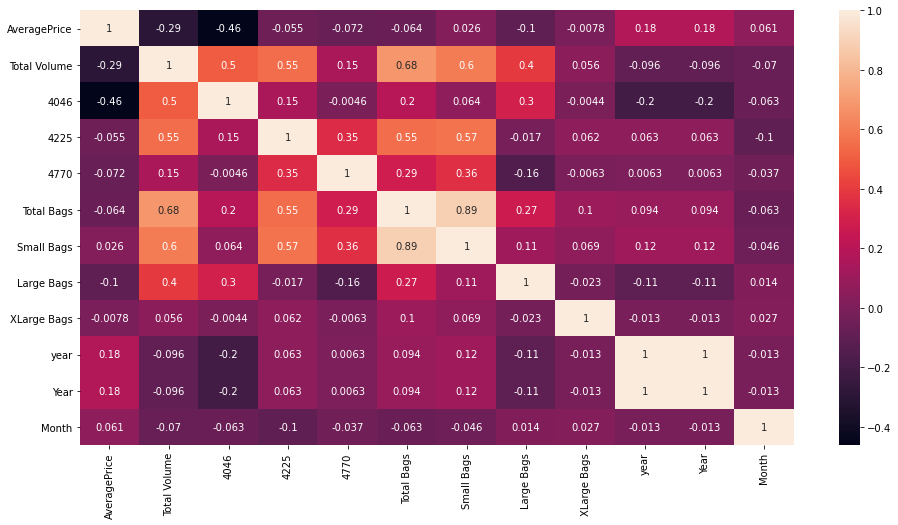

In [298]:
plt.figure(figsize=[16,8])
sns.heatmap(df4.corr(),annot=True)
plt.show()

As per the heatmap we are getting very poor correlation between Feature Average Price and XLarge Bags it is -0.0078.tase3t
I am dropping XLarge Bags from the dataset

In [300]:
df4.drop('XLarge Bags',axis=1,inplace=True)

# Checking out for skewness

In [301]:
df4.skew()

AveragePrice   -0.109444
Total Volume    1.646517
4046            2.125260
4225            1.549995
4770            2.110170
Total Bags      1.712775
Small Bags      1.752384
Large Bags      2.102504
year            1.828332
Year            1.828332
Month           0.101439
dtype: float64

In [302]:
from sklearn.preprocessing import power_transform

In [304]:
df4['Total Volume']=power_transform(df4['Total Volume'].values.reshape(-1,1))

In [306]:
df4['4046']=power_transform(df4['4046'].values.reshape(-1,1))

In [308]:
df4['4225']=power_transform(df4['4225'].values.reshape(-1,1))

In [310]:
df4['4770']=power_transform(df4['4770'].values.reshape(-1,1))

In [312]:
df4['Total Bags']=power_transform(df4['Total Bags'].values.reshape(-1,1))

In [314]:
df4['Small Bags']=power_transform(df4['Small Bags'].values.reshape(-1,1))

In [318]:
df4['Large Bags']=power_transform(df4['Large Bags'].values.reshape(-1,1))

In [319]:
df4.skew()

AveragePrice   -0.109444
Total Volume   -0.006385
4046           -0.066972
4225           -0.003413
4770           -0.121008
Total Bags      0.001502
Small Bags     -0.006939
Large Bags     -0.161110
year            1.828332
Year            1.828332
Month           0.101439
dtype: float64

# the skewness has been removed

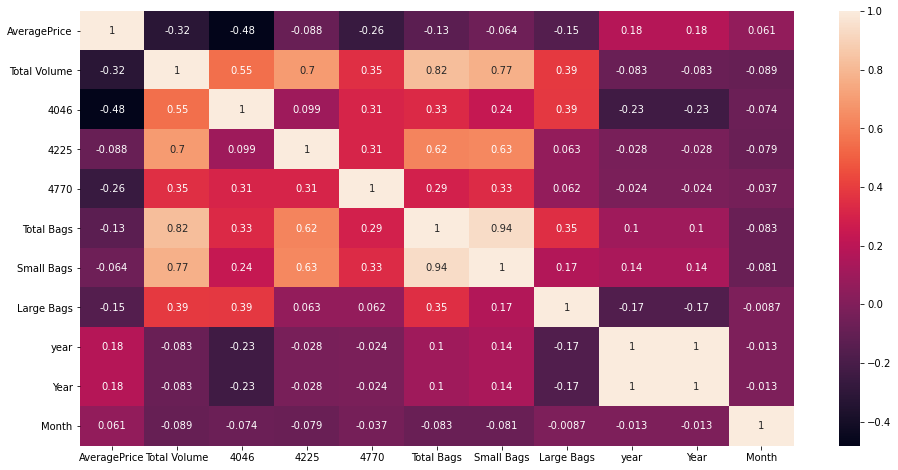

In [320]:
plt.figure(figsize=[16,8])
sns.heatmap(df4.corr(),annot=True)
plt.show()

As per the heat map we are getting very poor correlation of features 4225 and Small bags with the output target average price it can be dropped. Further, i am not dropping it as it is a loss of data.

In [321]:
from sklearn.preprocessing import LabelEncoder

In [323]:
le=LabelEncoder()
df4['type']=le.fit_transform(df4['type'])
df4['region']=le.fit_transform(df4['region'])
df4['year']=le.fit_transform(df4['year'])

In [324]:
df4

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,Year,Month
0.0,2015-12-27,1.33,-1.641924,-1.762256,-0.362348,-1.691376,-2.023857,-1.880880,-1.138902,0,0,0,2015,12
1.0,2015-12-20,1.35,-1.809676,-1.891666,-0.530071,-1.646407,-1.949737,-1.796472,-1.128516,0,0,0,2015,12
2.0,2015-12-13,0.93,-0.984973,-1.843317,0.247514,-1.435940,-2.077488,-1.943801,-1.115225,0,0,0,2015,12
3.0,2015-06-12,1.08,-1.420508,-1.734663,-0.122056,-1.592784,-2.341155,-2.257820,-1.051944,0,0,0,2015,6
4.0,2015-11-29,1.28,-1.886632,-1.792054,-0.545197,-1.581900,-2.294165,-2.211179,-0.950577,0,0,0,2015,11
5.0,2015-11-22,1.26,-1.788520,-1.720338,-0.467954,-1.713941,-2.234433,-2.130133,-1.063973,0,0,0,2015,11
6.0,2015-11-15,0.99,-1.361461,-1.673628,-0.101729,-1.528124,-2.060324,-1.926116,-1.074617,0,0,0,2015,11
7.0,2015-08-11,0.98,-1.068842,-1.879205,0.184849,-1.568086,-2.217715,-2.170525,-0.638401,0,0,0,2015,8
8.0,2015-01-11,1.02,-1.168430,-1.766668,0.047768,-1.551407,-1.794223,-1.636657,-0.849618,0,0,0,2015,1
9.0,2015-10-25,1.07,-1.485666,-1.825849,-0.213774,-1.476241,-2.030608,-1.941583,-0.637184,0,0,0,2015,10


In [325]:
df4.drop('Date',axis=1,inplace=True)
df4.drop('Year',axis=1,inplace=True)
df4.drop('Month',axis=1,inplace=True)

In [327]:
x=df4.drop('AveragePrice',axis=1)
y=df4['AveragePrice']

# Applying Standard Scaler

In [330]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [331]:
x=se.fit_transform(x)

# Splitting the data into train and test

In [390]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=82)

In [392]:
le=LinearRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_absolute_error(y_test,pred)))
print(r2_score(y_test,pred))

0.11725949220079919
0.022311817539588785
0.3424317336357704
0.3917952205183667


In [393]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_absolute_error(y_test,pred1)))
print(r2_score(y_test,pred1))

0.07854501385041551
0.01332088719738272
0.2802588336706187
0.6368817893921703


In [394]:
svr=SVR()
svr.fit(x_train,y_train)
pred2=svr.predict(x_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_absolute_error(y_test,pred2)))
print(r2_score(y_test,pred2))

0.07499670182931753
0.00888891192671144
0.27385525707810965
0.7576943828702164


In [395]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred3=knr.predict(x_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_absolute_error(y_test,pred3)))
print(r2_score(y_test,pred3))

0.06192763157894737
0.007233802631578946
0.248852630243177
0.8028115223447538


In [341]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred4=rfr.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_absolute_error(y_test,pred4)))
print(r2_score(y_test,pred4))


0.0588069311240586
0.006680816100329913
0.24250140437543574
0.8096239609219249


In [396]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_absolute_error(y_test,pred5)))
print(r2_score(y_test,pred5))


0.10402439717475695
0.016379133467622174
0.32252813392750246
0.5535161023480213


In [397]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred6=gr.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_absolute_error(y_test,pred6)))
print(r2_score(y_test,pred6))



0.0769209289850223
0.009781667222116494
0.27734622583518653
0.7333584883780055


# Checking out cross val score

In [346]:
from sklearn.model_selection import cross_val_score

In [398]:
score=cross_val_score(le,x,y,cv=5)
print(score.mean())

0.11004808234720798


In [399]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1.mean())

-0.3997048248229734


In [400]:
score2=cross_val_score(svr,x,y,cv=5)
print(score2.mean())

-0.09648334292714586


In [401]:
score3=cross_val_score(knr,x,y,cv=5)
print(score3.mean())

-0.14203968949666063


In [402]:
score4=cross_val_score(rfr,x,y,cv=5)
print(score4.mean())

0.18329947626710846


In [355]:
score5=cross_val_score(ada,x,y,cv=5)
print(score5.mean())

0.20851121293878108


In [403]:
score6=cross_val_score(gr,x,y,cv=5)
print(score6.mean())

0.1375195589142789


# I will apply Regularization techniques lasso and Ridge to check underfitting and overfitting

In [404]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_absolute_error(y_test,pred7)))
print(r2_score(y_test,pred7))


0.11732715086102186
0.022334866383116967
0.342530510846876
0.3911669249180423


In [405]:
rs=Ridge(alpha=0.0001)
rs.fit(x_train,y_train)
pred8=rs.predict(x_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_absolute_error(y_test,pred8)))
print(r2_score(y_test,pred8))


0.11725949667226887
0.022311819094829898
0.34243174016476463
0.3917951781235651


In [406]:
score7=cross_val_score(ls,x,y,cv=5)
print(score7.mean())

0.10993680924964347


In [407]:
score8=cross_val_score(rs,x,y,cv=5)
print(score7.mean())

0.10993680924964347


# Linear Regression, Lasso and Ridge regression is my best model will go for hypertuning of the parameters

In [408]:
from sklearn.model_selection import RandomizedSearchCV

In [409]:
params={'fit_intercept':['True','False']}

In [411]:
rsc=RandomizedSearchCV(le,param_distributions=params,n_jobs=-1,cv=5)
rsc.fit(x_train,y_train)
rsc.best_params_

{'fit_intercept': 'True'}

In [412]:
le=LinearRegression(fit_intercept=True)
le.fit(x_train,y_train)
pred9=le.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))

0.11725949220079919
0.022311817539588785
0.14937140803911833
0.3917952205183667


In [413]:
lasso_params={'alpha':[0.1, 0.01, 0.001, 0.0001,1]}

In [414]:
rsc1=RandomizedSearchCV(ls,param_distributions=lasso_params,n_jobs=-1,cv=5)
rsc1.fit(x_train,y_train)
rsc1.best_params_

{'alpha': 0.0001}

In [415]:
ls1=Lasso(alpha=0.0001)
ls1.fit(x_train,y_train)
pred10=ls1.predict(x_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))
                    

0.11732715086102186
0.022334866383116967
0.14944854092000018
0.3911669249180423


In [416]:
ridge_params={'alpha':[0.1,0.01,0.001,0.0001,1],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


In [418]:
rsc2=RandomizedSearchCV(rs,param_distributions=ridge_params,n_jobs=-1,cv=5)
rsc2.fit(x_train,y_train)
rsc2.best_params_

{'solver': 'sag', 'alpha': 1}

In [420]:
rd1=Ridge(alpha=1,solver='sag')
rd1.fit(x_train,y_train)
pred11=rd1.predict(x_test)
print(mean_absolute_error(y_test,pred11))
print(mean_squared_error(y_test,pred11))
print(np.sqrt(mean_squared_error(y_test,pred11)))
print(r2_score(y_test,pred11))

0.117334164397344
0.022339181466712738
0.14946297690971078
0.39104929871111616


# The r2 score of all the three models are same. Further Linear Regression is my best model with r2score of 40% as I am going up to 4 decimals for finding best mode

Text(0.5, 1.0, 'Ridge Regression')

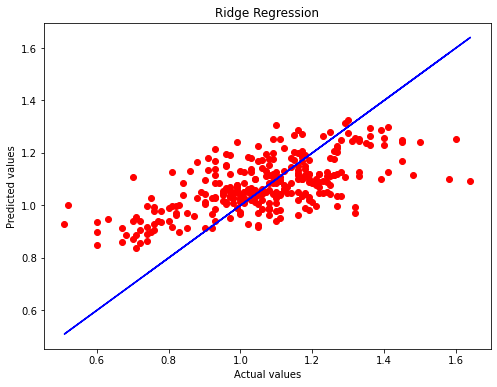

In [421]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred9,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Ridge Regression")

In [422]:
import joblib

In [423]:
joblib.dump(le,'avocado.obj')

['avocado.obj']

In [425]:
joblib.load('avocado.obj')

LinearRegression()